# Covid 19 Data Analysis from Brasil.io
This is a personal project where I tried to create an analysis of Brasil.io Covid-19 dataset

Date: 21/05/2020

In [38]:
# Imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [39]:
# Opening CSV file with pandas
data = pd.read_csv('caso.csv')
# print(data)

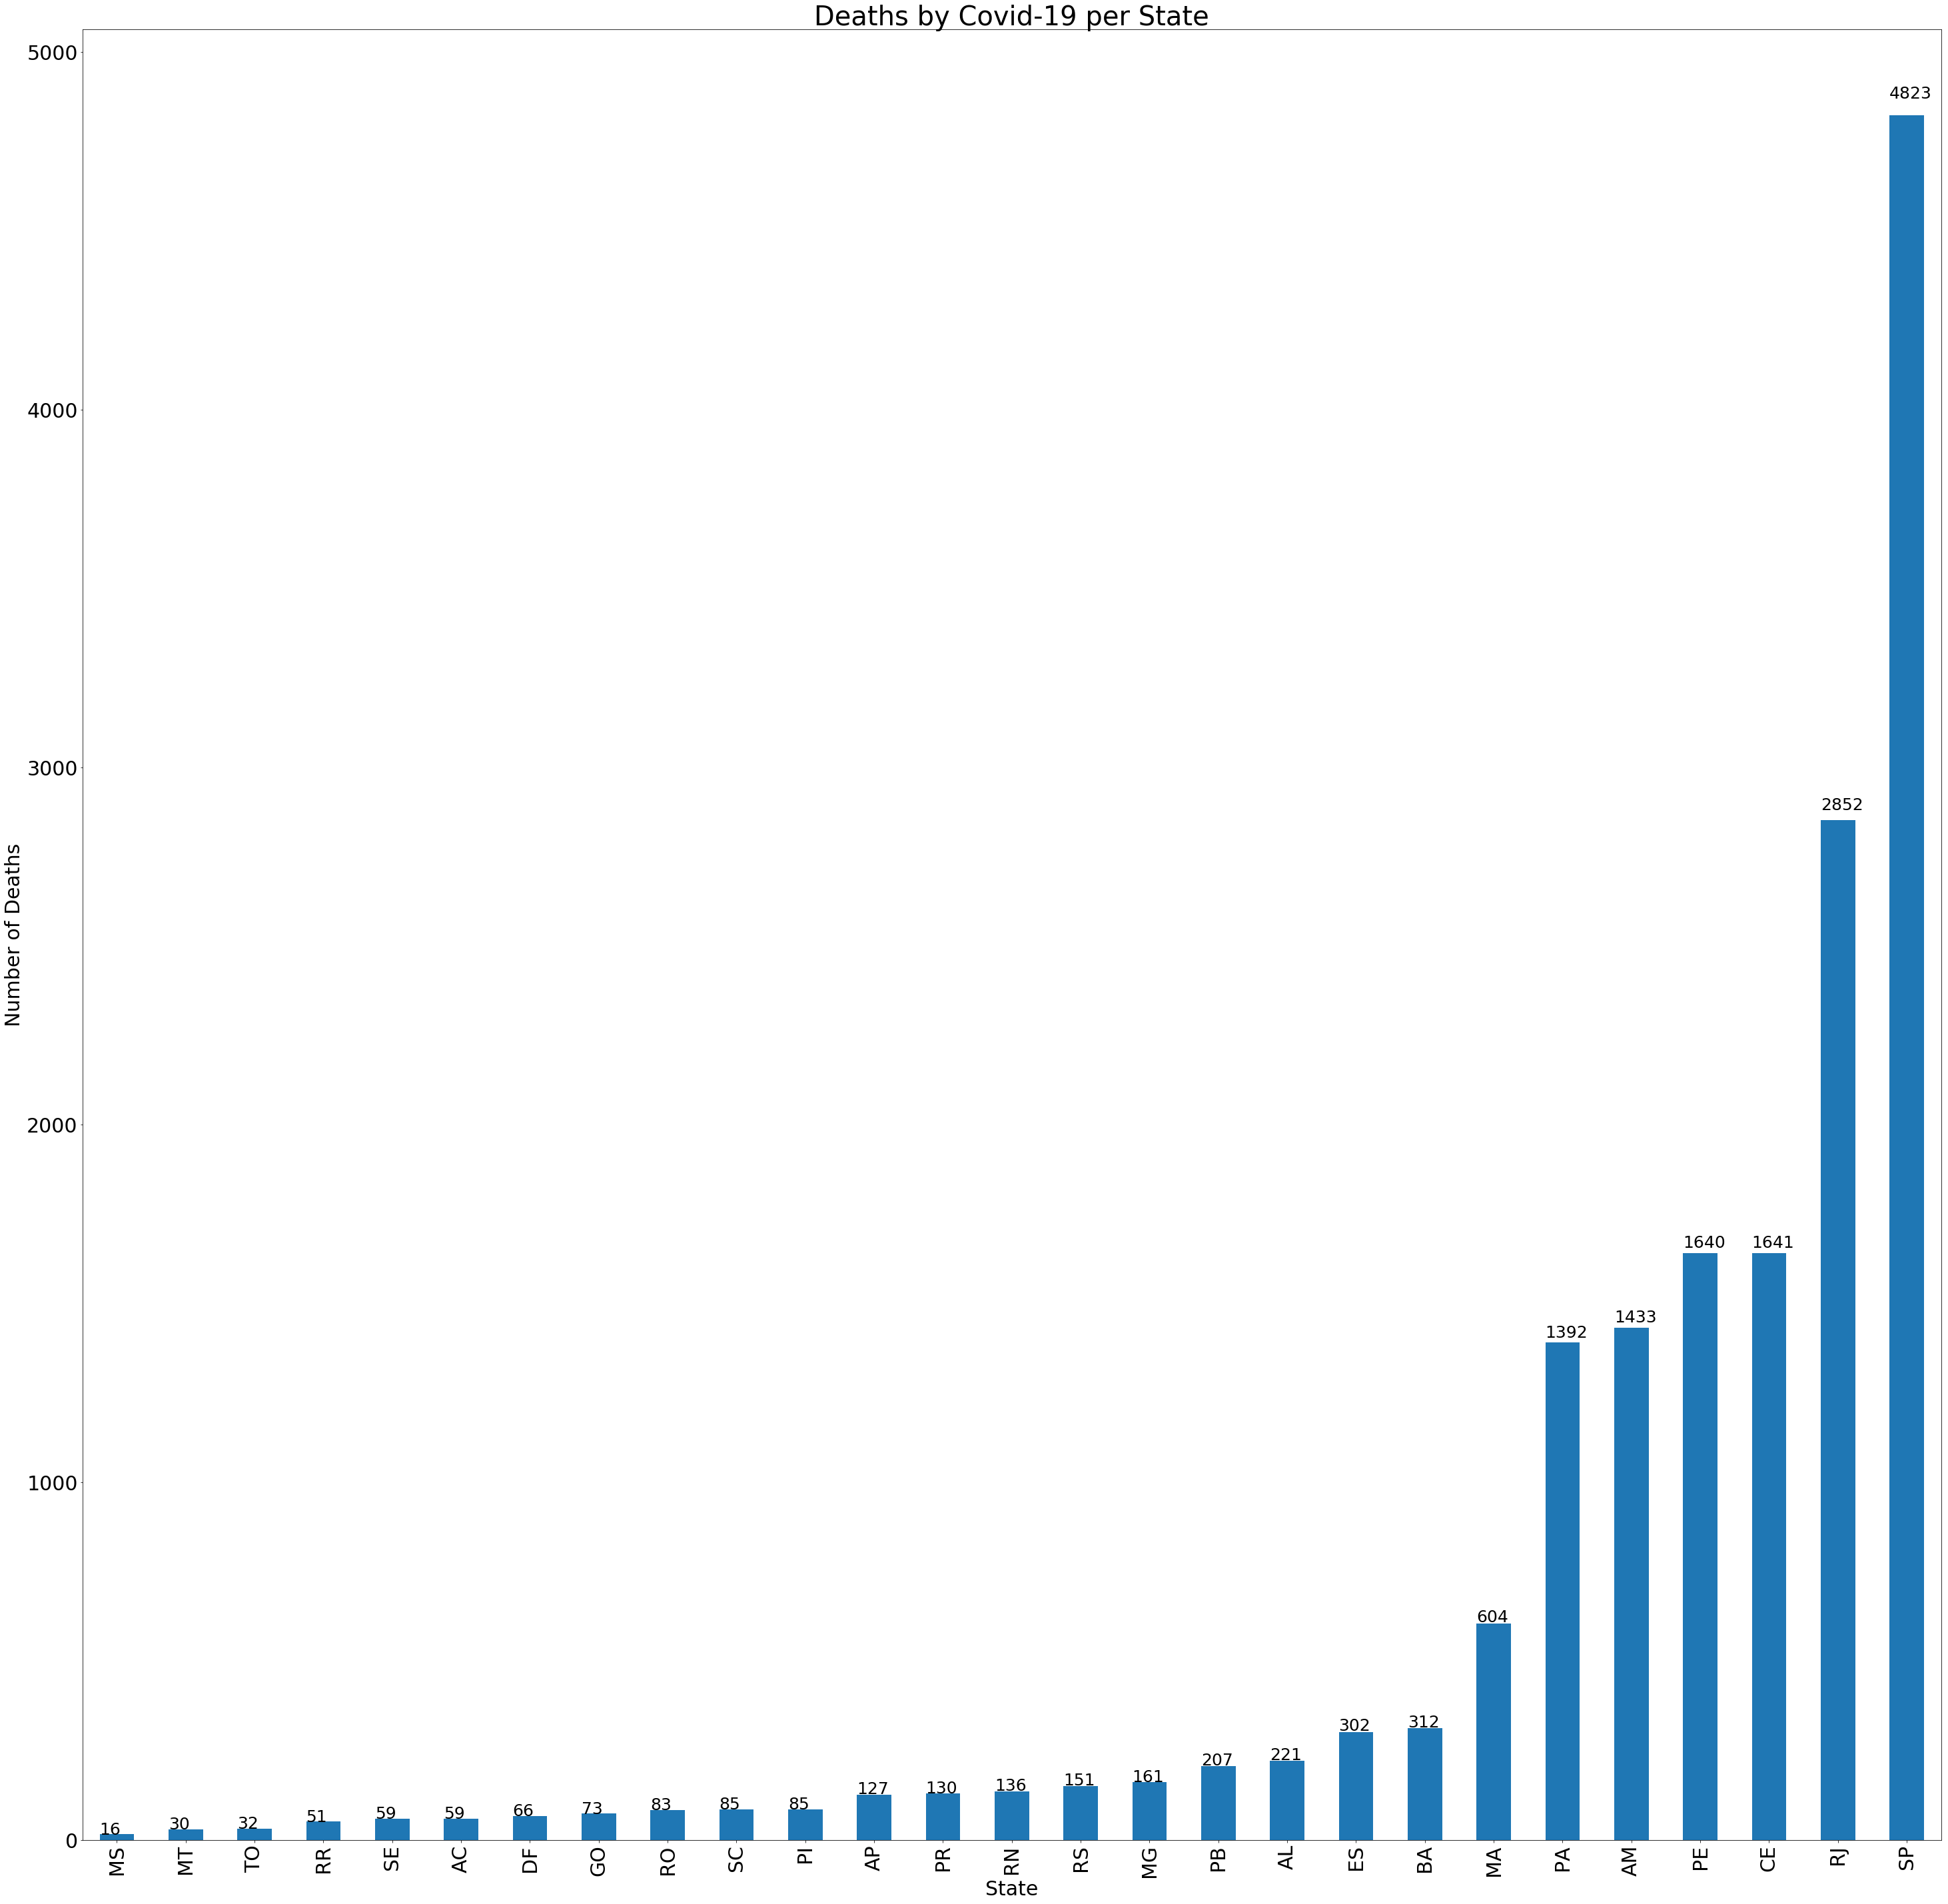

In [40]:
per_state = data.groupby('state')['deaths'].max()
per_state = per_state.sort_values()
# print(per_state.sort_values())

ax = per_state.plot('bar')

plt.xticks(size=30)
plt.yticks(size=30)
plt.title("Deaths by Covid-19 per State",size=40)
plt.xlabel("State", size=30)
plt.ylabel("Number of Deaths", size=30)

plt.rcParams["figure.figsize"] = (50,50)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.00, p.get_height() * 1.01), size=25)


# plt.savefig("deaths-per-state0.png", dpi=100)
plt.show()

### Diving deep into Ceará's Deaths

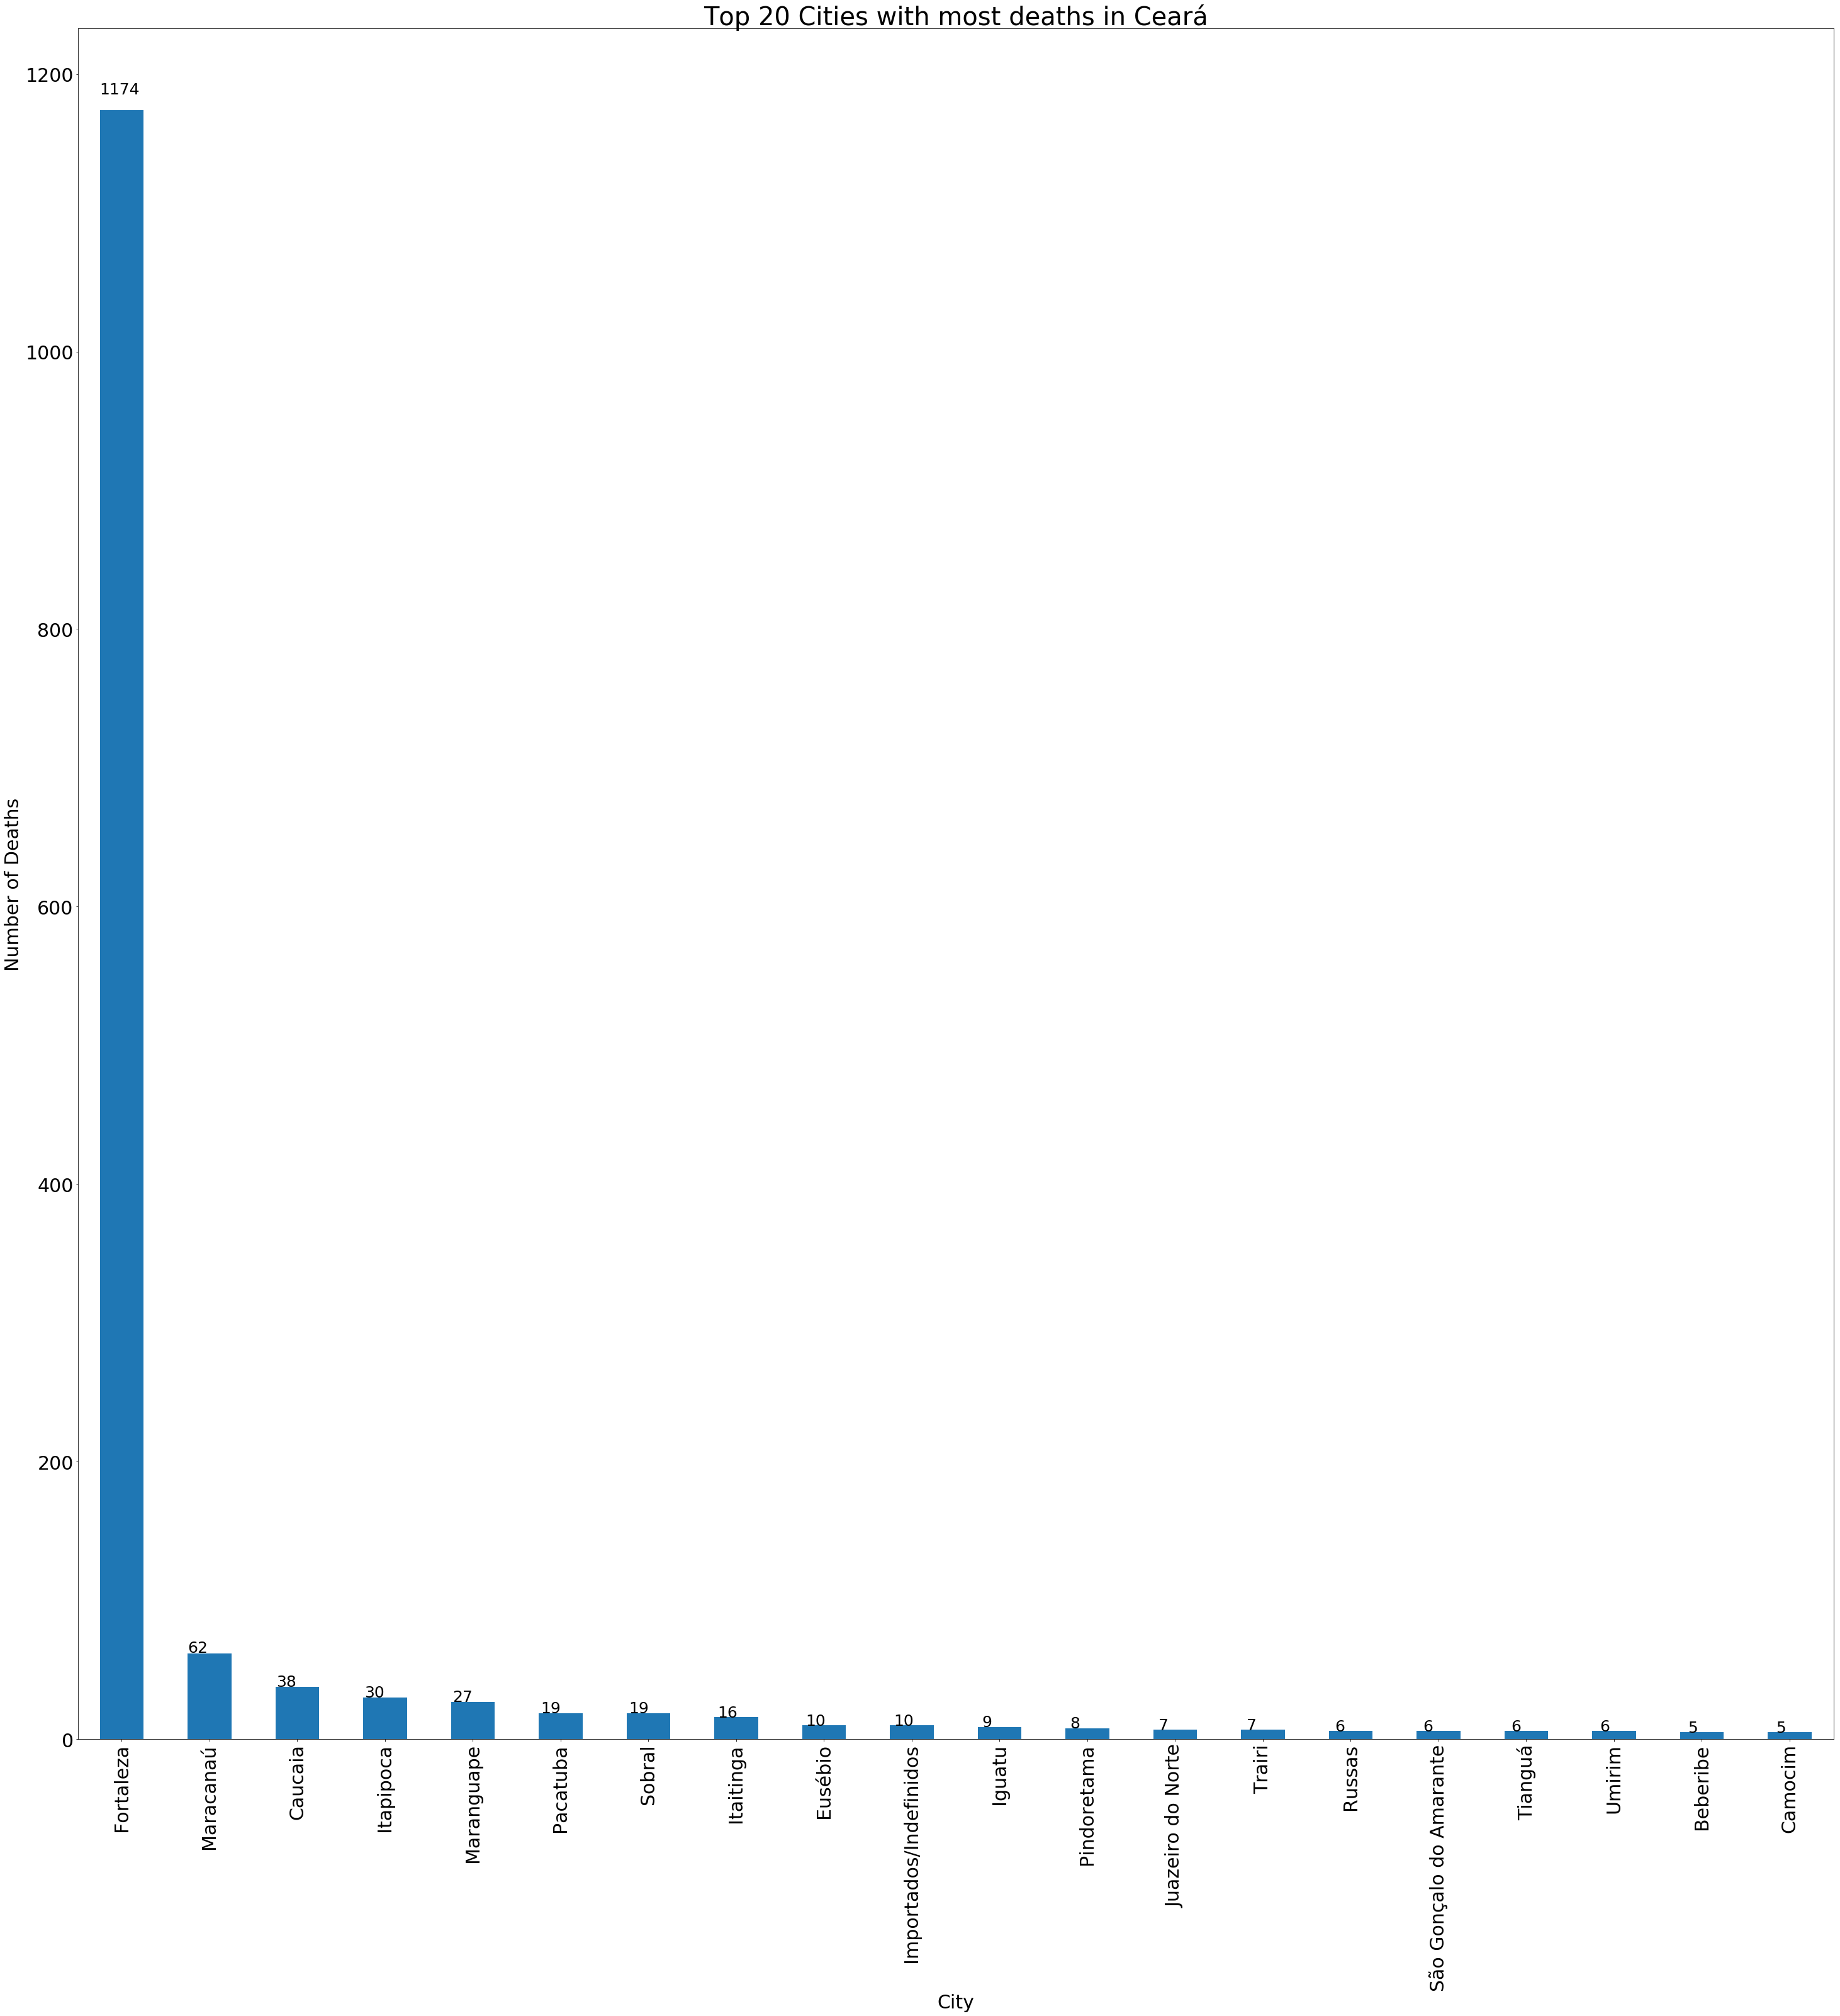

In [41]:
data = data.sort_values('state').reset_index(drop=True)

ceara = data.loc[data['state'] == 'CE'] # Pick only ceara
ceara.sort_values('deaths').reset_index(drop=True) # Sorting it byt number of deaths

ceara = ceara[~(ceara[['deaths']] == 0).any(axis=1)] # Remove cities with 0 deaths

deaths_ceara = ceara.groupby('city')['deaths'].max()
# print(deaths_ceara)
# print("Deaths in Fortaleza (capital): ", deaths_ceara['Fortaleza'])

largest = deaths_ceara.nlargest(20)

# deaths_ceara.plot('bar')
ax = largest.plot('bar')
plt.xticks(size=30)
plt.yticks(size=30)
plt.title("Top 20 Cities with most deaths in Ceará", size=40)
plt.xlabel("City", size=30)
plt.ylabel("Number of Deaths", size=30)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.01), size=25)

# plt.savefig("figures/deaths-ceara.png", dpi=200)
plt.show()

### Confirmed cases per 100k inhabitants
Ceará's cities

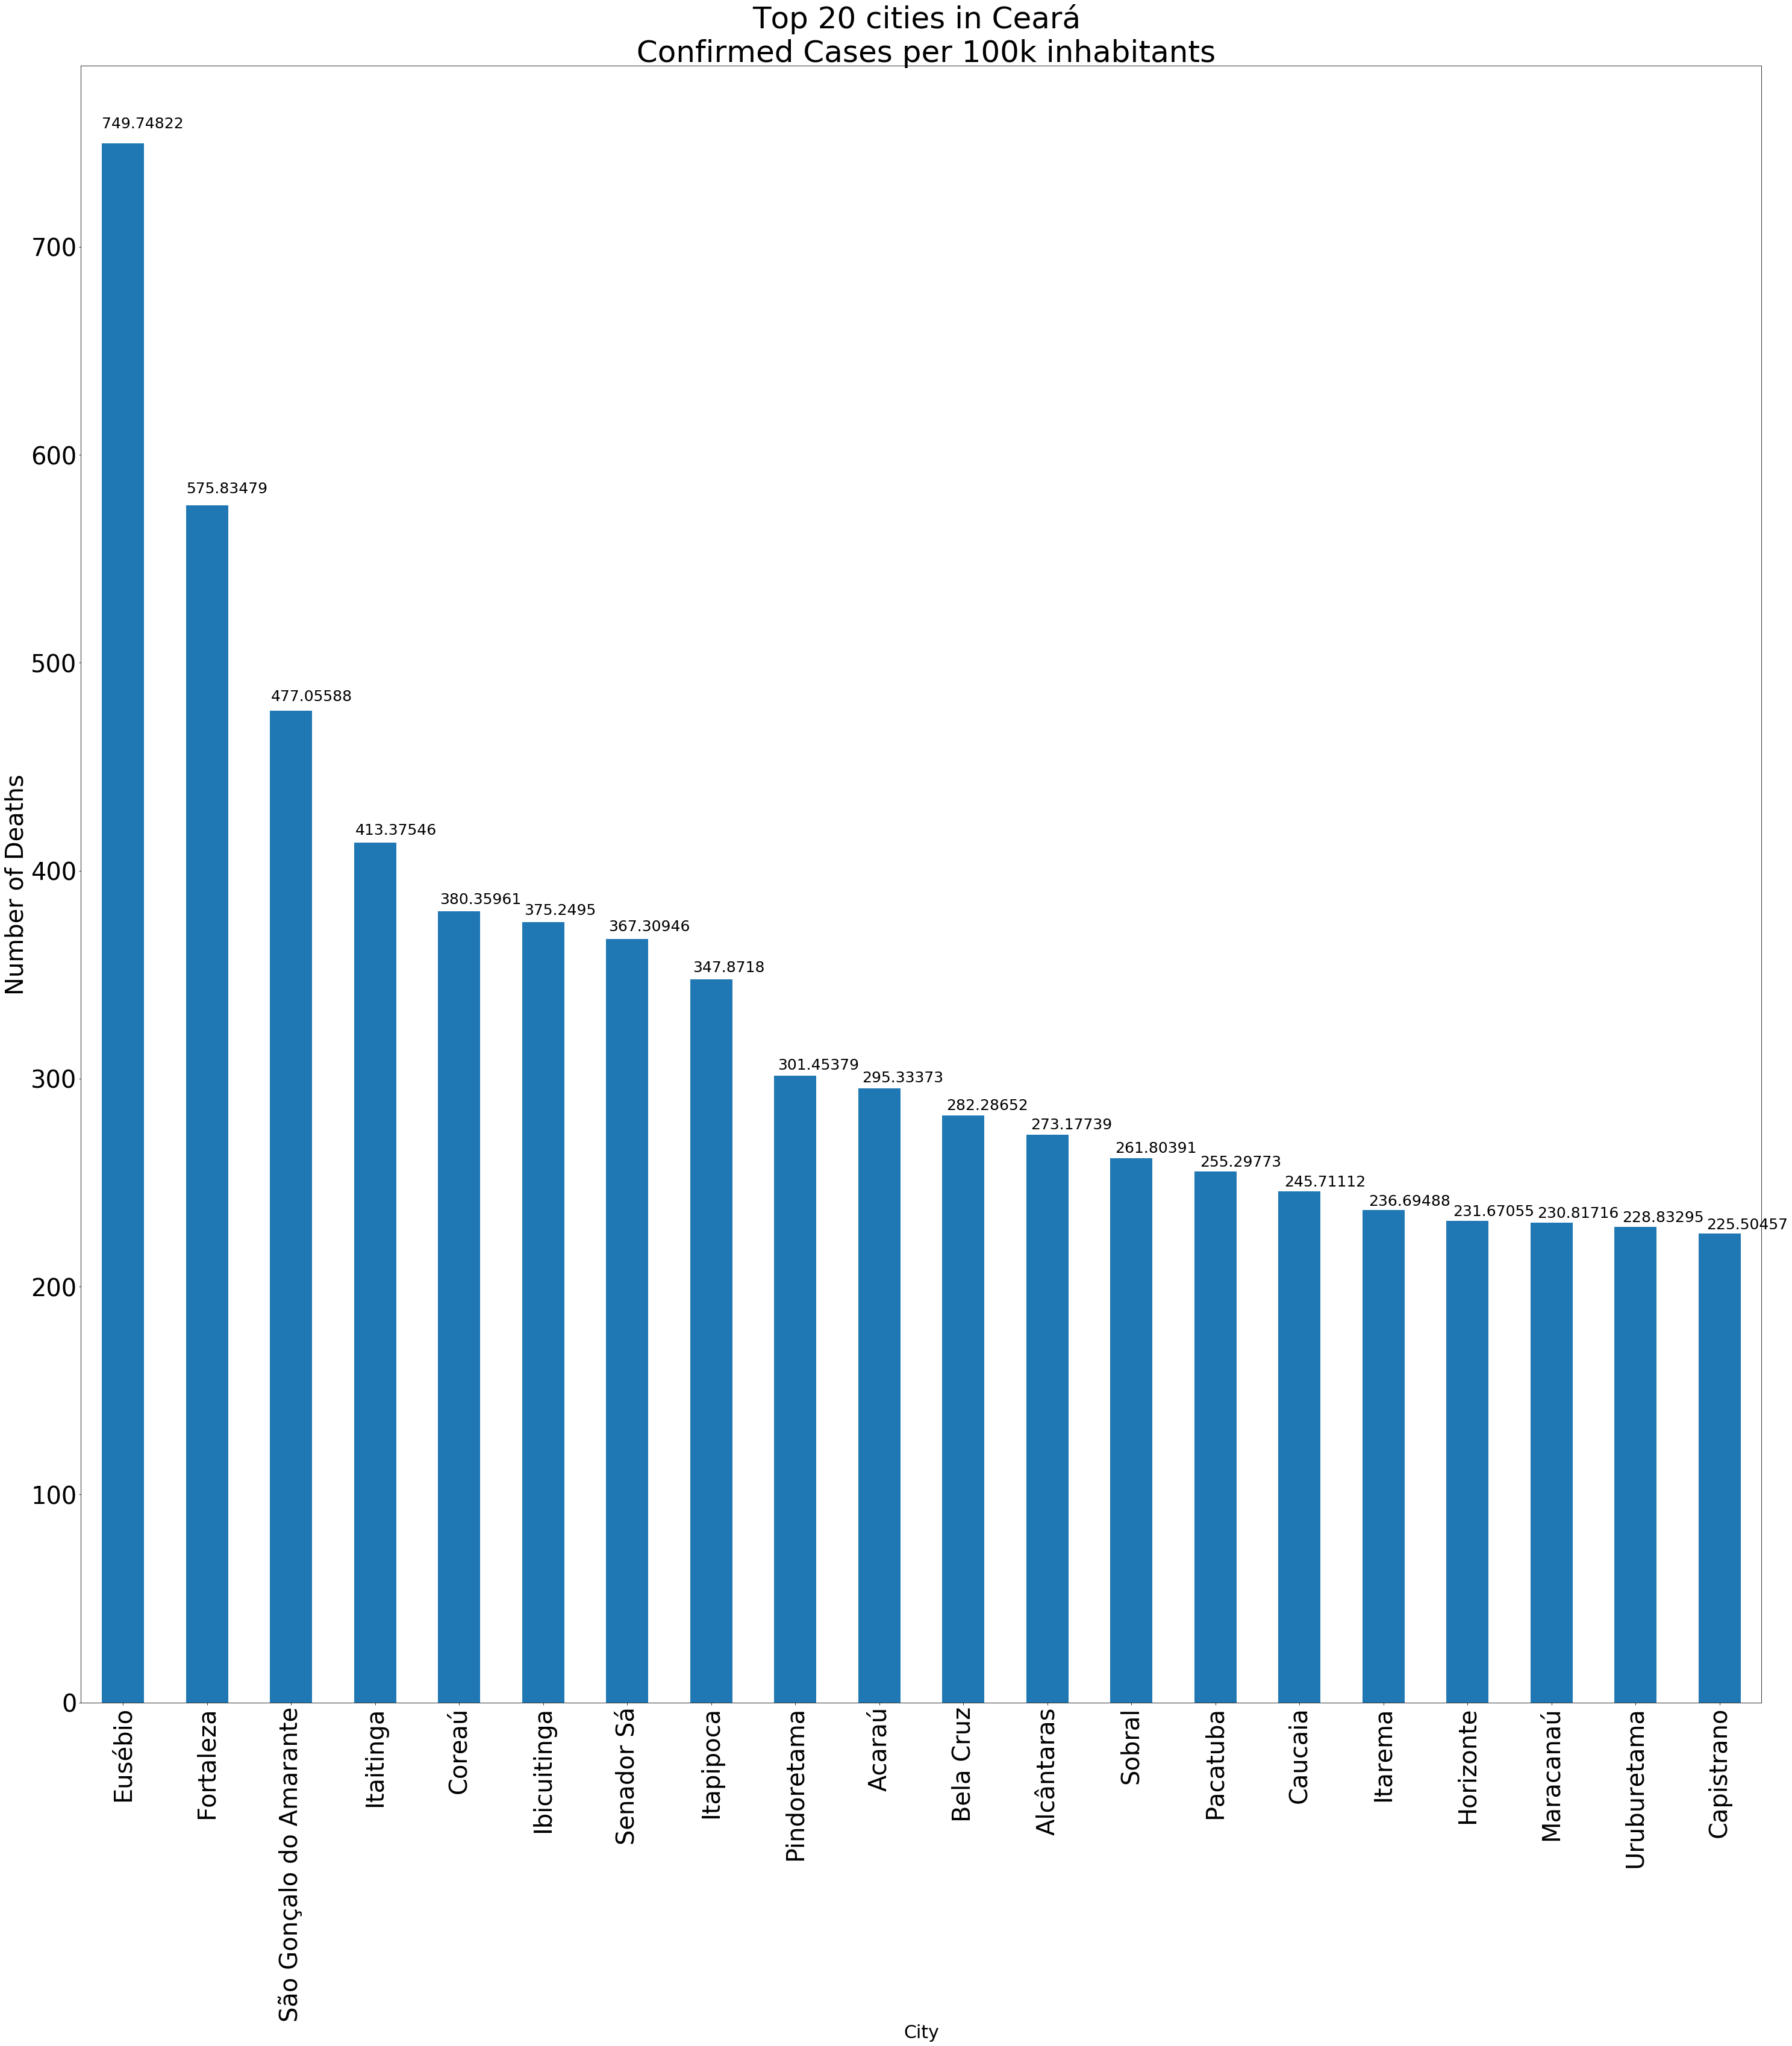

In [58]:
ceara = data.loc[data['state'] == 'CE'] # Pick only ceara
ceara.sort_values('confirmed_per_100k_inhabitants').reset_index(drop=True) 

confirmed_ceara = ceara.groupby('city')['confirmed_per_100k_inhabitants'].max()
confirmed_ceara['Fortaleza']

most_cases = confirmed_ceara.nlargest(20)
most_cases

ax = most_cases.plot('bar')

plt.xticks(size=40)
plt.yticks(size=40)
plt.title("Top 20 cities in Ceará \n Confirmed Cases per 100k inhabitants", size=50)
plt.xlabel("City", size=30)
plt.ylabel("Number of Deaths", size=40)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.01), size=25)

plt.savefig("figures/confirmed-cases-ceara-per-100k.png", dpi=200)
plt.show()

### Diving deeper into Fortaleza's deaths.

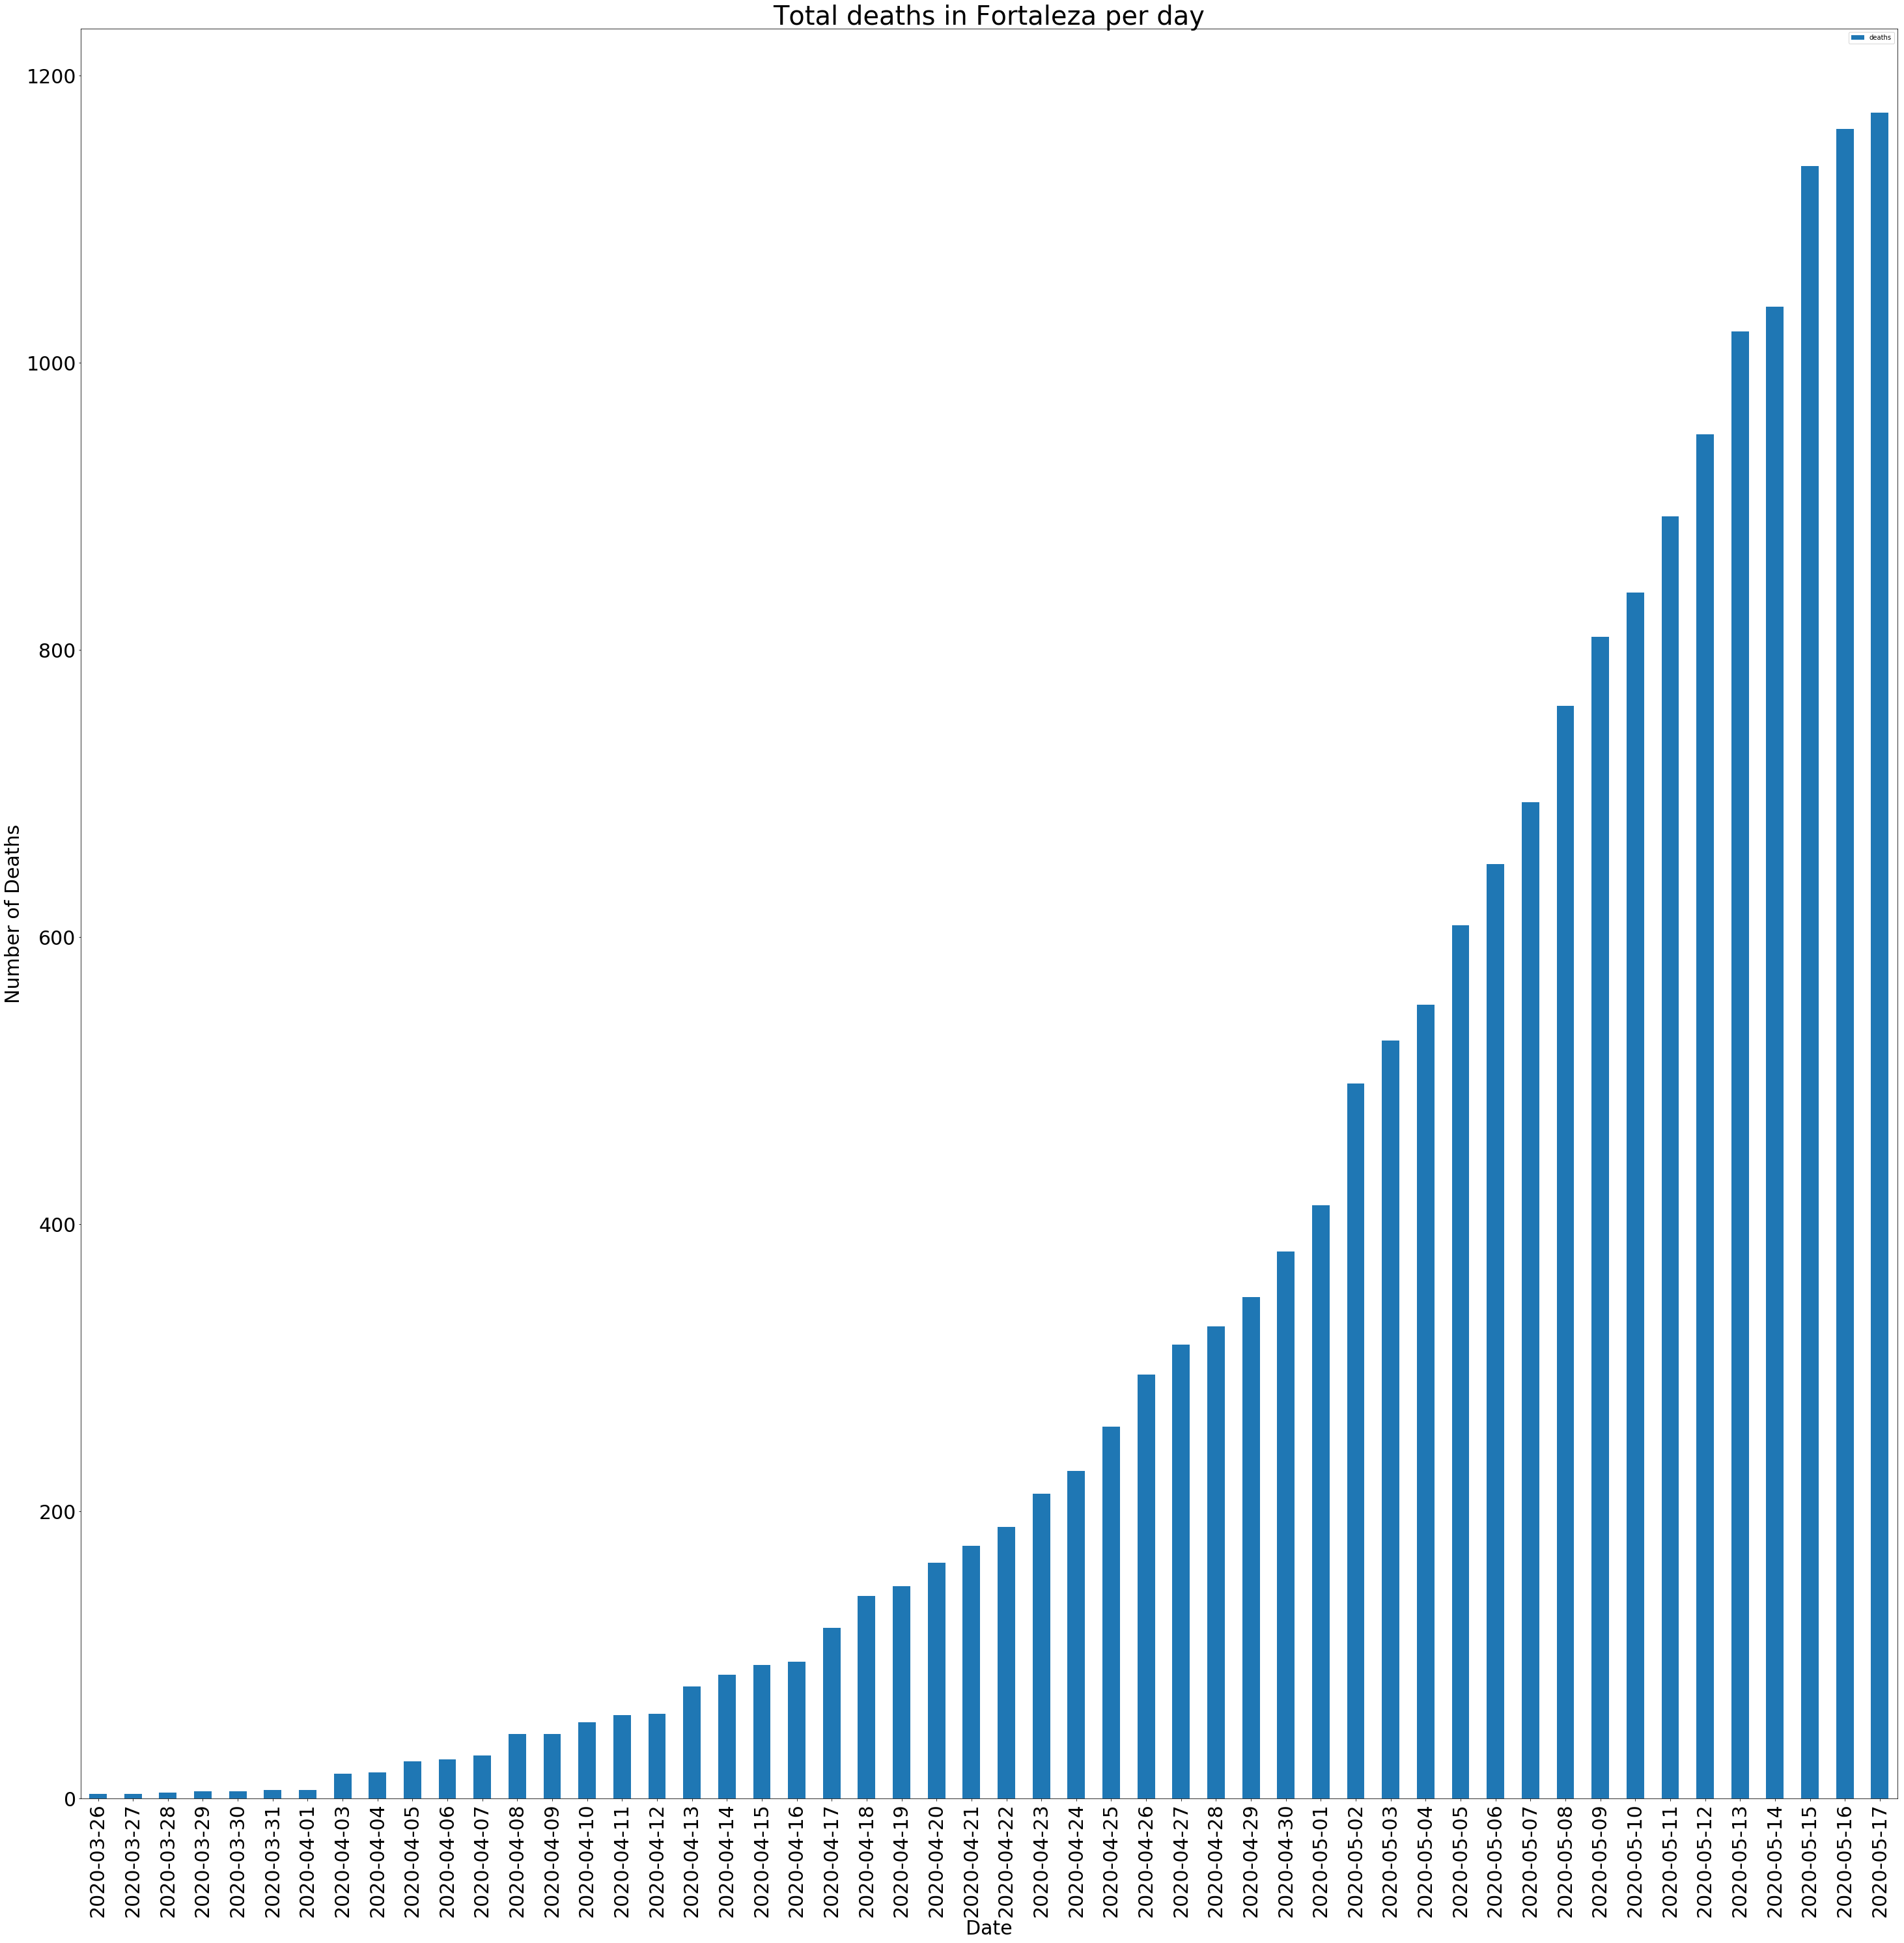

In [15]:
ceara = ceara.reset_index(drop=True)
fortaleza = ceara.loc[ceara['city'] == 'Fortaleza']
fortaleza = fortaleza.sort_values('date')

ay = fortaleza.plot(kind='bar', x='date', y='deaths')

plt.xticks(size=30)
plt.yticks(size=30)
plt.title("Total deaths in Fortaleza per day", size=40)
plt.xlabel("Date", size=30)
plt.ylabel("Number of Deaths", size=30)

# plt.savefig('figures/deaths-fortaleza.png', dpi=200)
plt.show()